# Natural Language Processing
We will train a supervised training model to predict if a tweet has a positive or negative sentiment.

####  **Dataset loading & dev/test splits**

**1.1) Load the twitter dataset from NLTK library**

In [231]:
import nltk
nltk.download('twitter_samples')
from nltk.corpus import twitter_samples
nltk.download('punkt')
nltk.download('stopwords')

import warnings
warnings.filterwarnings("ignore")

from nltk.corpus import stopwords
stop = stopwords.words('english')
import pandas as pd
import string
import re
from sklearn.model_selection import train_test_split
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import classification_report

[nltk_data] Downloading package twitter_samples to /root/nltk_data...
[nltk_data]   Package twitter_samples is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


**1.2) Load the positive & negative tweets**

In [232]:
all_positive_tweets = twitter_samples.strings('positive_tweets.json')
all_negative_tweets = twitter_samples.strings('negative_tweets.json')

**1.3) Make a data frame that has all tweets and their corresponding labels**

In [233]:
# Your Code Here
label1 = [1]*len(all_positive_tweets)
label2 = [0]*len(all_negative_tweets)
data = {'tweet':all_positive_tweets+all_negative_tweets , 'label': label1+label2}

df = pd.DataFrame(data)
df

,tweet,label
0,#FollowFriday @France_Inte @PKuchly57 @Milipol...,1
1,@Lamb2ja Hey James! How odd :/ Please call our...,1
2,@DespiteOfficial we had a listen last night :)...,1
3,@97sides CONGRATS :),1
4,yeaaaah yippppy!!! my accnt verified rqst has...,1
...,...,...
9995,I wanna change my avi but uSanele :(,0
9996,MY PUPPY BROKE HER FOOT :(,0
9997,where's all the jaebum baby pictures :((,0
9998,But but Mr Ahmad Maslan cooks too :( https://t...,0


**1.4) Look at the class distribution of the tweets**

In [234]:
# Your Code Here
df['label'].value_counts()

,count
label,
1,5000
0,5000


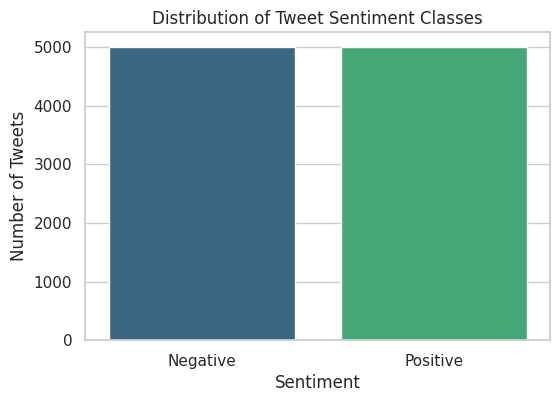

In [235]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="whitegrid")

plt.figure(figsize=(6,4))
sns.countplot(data=df, x='label', palette='viridis')

plt.xticks([0, 1], ['Negative', 'Positive'])
plt.title('Distribution of Tweet Sentiment Classes')
plt.xlabel('Sentiment')
plt.ylabel('Number of Tweets')

plt.show()

**1.5) Create a development & test split (80/20 ratio):**

In [236]:
# Your Code Here
X_dev, X_test, y_dev, y_test = train_test_split(df['tweet'], df['label'], stratify=df['label'], test_size=0.2, random_state=42)

print("X_dev shape- ", X_dev.shape)
print("X_test shape- ", X_test.shape)

X_dev shape-  (8000,)
X_test shape-  (2000,)


#### **Data preprocessing**
We will do some data preprocessing before we tokenize the data. We will remove `#` symbol, hyperlinks, stop words & punctuations from the data. You can use the `re` package in python to find and replace these strings.

**1.6) Replace the `#` symbol with '' in every tweet**

In [237]:
# Your Code Here
for i in X_dev.index:
  X_dev[i]=X_dev[i].lower()
  X_dev[i] = re.sub(r"#", "", X_dev[i])

for i in X_test.index:
  X_test[i]=X_test[i].lower()
  X_test[i] = re.sub(r"#", "", X_test[i])

**1.7) Replace hyperlinks with '' in every tweet**

In [238]:
# Your Code Here
for i in X_dev.index:
  X_dev[i] = re.sub(r'http\S+|www.[a-zA-Z0-9]+\S+', "", X_dev[i])

for i in X_test.index:
  X_test[i] = re.sub(r'http\S+|www.[a-zA-Z0-9]+\S+', "", X_test[i])

**1.8) Remove all stop words**

In [239]:
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [240]:
# Your Code Here

stop_words = set(stopwords.words('english'))

def removeStop(data):
    tokens = word_tokenize(data, language='english')
    filtered = [word.lower() for word in tokens if word.lower() not in stop_words]
    data = ' '.join(filtered)
    return data



for i in X_dev.index:
  X_dev[i] = removeStop(X_dev[i])

for i in X_test.index:
  X_test[i] = removeStop(X_test[i])

In [241]:
X_dev

,tweet
7858,@ cooldigangana @ diganganas want attend ur bi...
1842,thanks jen ... top weekend everyone ! : )
8905,@ chonchonnie yet finish ! 'm still season 7. : (
2684,thankyou x : )
6564,c looked happy banana socks : (
...,...
4987,@ andrewsmith1443 're right ! thx andrew & amp...
6717,@ jrmychan hahah dunwan keep also suan le ba h...
3795,@ theroyalfactor : : 've always liked large le...
8691,@ richieboi50uk shit sorry : ( take lots things ?


**1.9) Remove all punctuations**

In [242]:
# Your Code Here
import string

for i in X_dev.index:
  X_dev[i] = re.sub(f"[{re.escape(string.punctuation)}]", " ", X_dev[i])

for i in X_test.index:
  X_test[i] = re.sub(f"[{re.escape(string.punctuation)}]", " ", X_test[i])


In [243]:
for i in X_dev.index:
  X_dev[i] = removeStop(X_dev[i])

for i in X_test.index:
  X_test[i] = removeStop(X_test[i])

In [244]:
X_dev

,tweet
7858,cooldigangana diganganas want attend ur birthd...
1842,thanks jen top weekend everyone
8905,chonchonnie yet finish still season 7
2684,thankyou x
6564,c looked happy banana socks
...,...
4987,andrewsmith1443 right thx andrew amp great day
6717,jrmychan hahah dunwan keep also suan le ba hai...
3795,theroyalfactor always liked large let
8691,richieboi50uk shit sorry take lots things


**1.10) Apply stemming on the development & test datasets using Porter algorithm**

In [245]:
# Your Code Here
stemmer = PorterStemmer()

def stem_tweet(tweet):
    tokens = word_tokenize(tweet)
    stemmed = [stemmer.stem(word) for word in tokens]
    return ' '.join(stemmed)

X_dev = X_dev.apply(stem_tweet)
X_test= X_test.apply(stem_tweet)

In [246]:
X_dev

,tweet
7858,cooldigangana digangana want attend ur birthda...
1842,thank jen top weekend everyon
8905,chonchonni yet finish still season 7
2684,thankyou x
6564,c look happi banana sock
...,...
4987,andrewsmith1443 right thx andrew amp great day
6717,jrmychan hahah dunwan keep also suan le ba hai...
3795,theroyalfactor alway like larg let
8691,richieboi50uk shit sorri take lot thing


#### **Model training**

**1.11) Create bag of words features for each tweet in the development dataset**

In [247]:
# Your Code Here
vectorizer = CountVectorizer()

X_dev_bow = vectorizer.fit_transform(X_dev)

print(f"Bag of Words feature matrix shape: {X_dev_bow.shape}")

Bag of Words feature matrix shape: (8000, 14489)


**1.12) Train a Logistic Regression model on the development dataset**

In [248]:
# Your Code Here
model = LogisticRegression()
model.fit(X_dev_bow, y_dev)

LogisticRegression()

**1.13) Create TF-IDF features for each tweet in the development dataset**

In [249]:
# Your Code Here
tfidf_vectorizer = TfidfVectorizer()

X_dev_tfidf = tfidf_vectorizer.fit_transform(X_dev)

print(f"TF-IDF feature matrix shape: {X_dev_tfidf.shape}")

TF-IDF feature matrix shape: (8000, 14489)


**1.14) Train the Logistic Regression model on the development dataset with TF-IDF features**

In [250]:
# Your Code Here
model2 = LogisticRegression()
model2.fit(X_dev_tfidf, y_dev)

LogisticRegression()

**1.15) Compare the performance of the two models on the test dataset using a classification report and the scores obtained. Explain the difference in results obtained.**

In [251]:
X_test_bow = vectorizer.transform(X_test)

print(f"Bag of Words feature matrix shape: {X_test_bow.shape}")

Bag of Words feature matrix shape: (2000, 14489)


In [252]:
# Your Code Here
model.score(X_test_bow, y_test)

0.753

In [253]:
y_pred1= model.predict(X_test_bow)

In [254]:
print(classification_report(y_pred1, y_test))

              precision    recall  f1-score   support

           0       0.79      0.74      0.76      1070
           1       0.72      0.77      0.74       930

    accuracy                           0.75      2000
   macro avg       0.75      0.75      0.75      2000
weighted avg       0.76      0.75      0.75      2000



In [255]:
X_test_tfidf = tfidf_vectorizer.transform(X_test)

print(f"TF-IDF feature matrix shape: {X_test_tfidf.shape}")

TF-IDF feature matrix shape: (2000, 14489)


In [256]:
model2.score(X_test_tfidf, y_test)

0.76

In [257]:
y_pred2= model2.predict(X_test_tfidf)
print(classification_report(y_pred2, y_test))

              precision    recall  f1-score   support

           0       0.78      0.75      0.76      1032
           1       0.74      0.77      0.76       968

    accuracy                           0.76      2000
   macro avg       0.76      0.76      0.76      2000
weighted avg       0.76      0.76      0.76      2000



## Explanation here

From the results above, the difference in score is ~0.007 and the difference between the f1-scores are also 1. So there isn't a big impact in choosing one model over the other for this task.

Reasons why both BOW and TF-IDF might both work the same for this task is because:

a. Frequent words are actually informative - so, TF-IDF's down-weighting doesn't add much benefit — BoW already captures enough useful signal.,

b. Dataset is clean and well-balanced - in short texts (like tweets), word repetition is rare, so BoW and TF-IDF may behave similarly.  

c. Model isn't complex enough to show a difference - Logistic Regression is linear, so it might not fully exploit subtle differences between feature representations.
More complex models (like SVM, gradient boosting, or even neural nets) might show differences

These models greatly depend on the data that's used, so perhaps, for a different dataset BOW may prove to be more useful than TF-IDF or vice-versa - it depends on the NLP task.